# EDA

## Basic infomation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
# train_amens=pd.read_csv('train_amens.csv')
# test_amens=pd.read_csv('test_amens.csv')

# print(f"train set:{train_df.shape}\n{train_df.isna().sum()}\n")
# print(f"test set:{test_df.shape},\n{test_df.isna().sum()}")
train_df.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET,FLOOR_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,ECO_CATEGORY,LEASE_COMMENCE_DATA,RESALE_PRICE
0,2020-10,woodlands,4 room,681B,woodlands drive 62,07 to 09,102.0,premium apartment,uncategorized,2000,420000.0
1,2021-07,bishan,4 room,264,bishan street 24,07 to 09,104.0,model a,uncategorized,1992,585000.0
2,2021-05,bukit panjang,4 room,520,jelapang road,19 to 21,102.0,model a,uncategorized,1998,450000.0
3,2021-08,punggol,4 room,121B,edgedale plains,16 to 18,93.0,model a,uncategorized,2017,465000.0
4,2023-05,hougang,5 room,997B,Buangkok Crescent,10 to 12,113.0,improved,uncategorized,2018,710000.0


In [14]:
train_df.info()
train_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MONTH                162691 non-null  datetime64[ns]
 1   TOWN                 162691 non-null  object        
 2   FLAT_TYPE            162691 non-null  object        
 3   BLOCK                162691 non-null  object        
 4   STREET               162691 non-null  object        
 5   FLOOR_RANGE          162691 non-null  object        
 6   FLOOR_AREA_SQM       162691 non-null  float64       
 7   FLAT_MODEL           162691 non-null  object        
 8   ECO_CATEGORY         162691 non-null  object        
 9   LEASE_COMMENCE_DATA  162691 non-null  int64         
 10  RESALE_PRICE         162691 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 13.7+ MB


MONTH                   103
TOWN                     26
FLAT_TYPE                12
BLOCK                  2741
STREET                 1145
FLOOR_RANGE              17
FLOOR_AREA_SQM          176
FLAT_MODEL               21
ECO_CATEGORY              1
LEASE_COMMENCE_DATA      57
RESALE_PRICE           3974
dtype: int64

In [15]:
train_df[train_df.duplicated(keep=False)].sort_values(by=list(train_df.columns)) # check duplicate rows

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET,FLOOR_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,ECO_CATEGORY,LEASE_COMMENCE_DATA,RESALE_PRICE
60807,2017-01-01,bukit merah,4-room,106,Henderson Crescent,07 to 09,81.0,improved,uncategorized,1975,470000.0
141911,2017-01-01,bukit merah,4-room,106,Henderson Crescent,07 to 09,81.0,improved,uncategorized,1975,470000.0
7243,2017-01-01,jurong east,4-room,265,toh guan road,04 to 06,101.0,model a,uncategorized,1998,470000.0
51572,2017-01-01,jurong east,4-room,265,toh guan road,04 to 06,101.0,model a,uncategorized,1998,470000.0
140072,2017-01-01,punggol,4-room,601C,punggol central,13 to 15,94.0,model a,uncategorized,2012,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
28199,2025-04-01,sembawang,4 room,103B,canberra street,04 to 06,93.0,model a,uncategorized,2020,610000.0
89937,2025-04-01,sembawang,4 room,103B,canberra street,04 to 06,93.0,model a,uncategorized,2020,610000.0
141318,2025-04-01,sembawang,4 room,103B,canberra street,04 to 06,93.0,model a,uncategorized,2020,610000.0
75640,2025-05-01,hougang,4 room,994C,Buangkok Link,10 to 12,93.0,model a,uncategorized,2021,675000.0


In [12]:
# Convert 'MONTH' column to datetime format temporarily 
month_series = pd.to_datetime(train_df['MONTH'], format='%Y-%m')

# Print the earliest and latest month in the dataset
print("Earliest month:", month_series.min())
print("Latest month:", month_series.max())

# Show the distribution of samples across months (sorted chronologically)
print("\nMonthly distribution:")
print(month_series.value_counts().sort_index())

Earliest month: 2017-01-01 00:00:00
Latest month: 2025-07-01 00:00:00

Monthly distribution:
MONTH
2017-01-01     913
2017-02-01     839
2017-03-01    1437
2017-04-01    1372
2017-05-01    1504
              ... 
2025-03-01    1475
2025-04-01    1784
2025-05-01    1763
2025-06-01    1714
2025-07-01    1981
Name: count, Length: 103, dtype: int64


# Distribution of RESALE_PRICE
The original resale price distribution is highly right-skewed, with a long tail of high-value transactions.
By applying a logarithmic transformation, the distribution becomes approximately normal and more symmetric.
This helps:

Stabilize variance and reduce the influence of extreme outliers.

Improve model performance for linear models that assume normality.

Enhance interpretability, as changes in log(price) correspond to percentage changes in actual price.

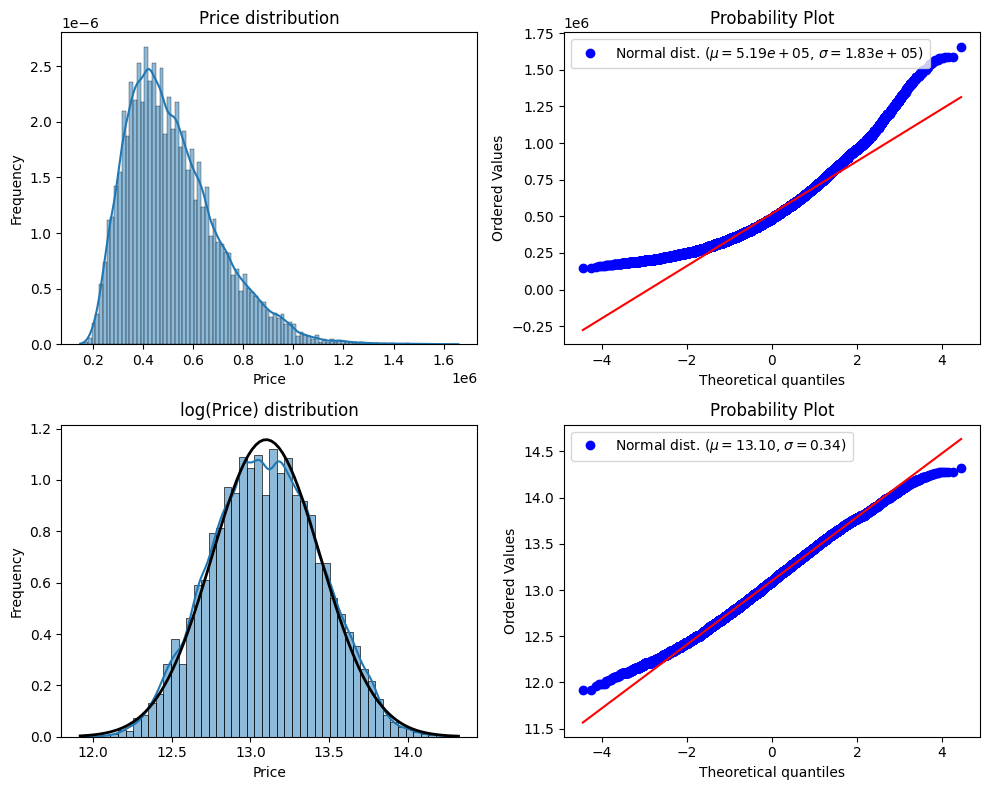

In [ ]:
prices = train_df['RESALE_PRICE']

plt.figure(figsize=(10, 8))

# Distribution of RESALE_PRICE
plt.subplot(2, 2, 1)
sns.histplot(prices, bins=100, kde=True, stat="density")
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Q-Q plot of RESALE_PRICE
plt.subplot(2, 2, 2)
mu_raw, sigma_raw = prices.mean(), prices.std()
stats.probplot(prices, dist="norm", plot=plt)
plt.title("Probability Plot")
plt.legend([f"Normal dist. ($\\mu={mu_raw:.2e}$, $\\sigma={sigma_raw:.2e}$)"], loc="best")

# Log transformation of RESALE_PRICE
log_prices = np.log(prices)

plt.subplot(2, 2, 3)
sns.histplot(log_prices, bins=50, kde=True, stat="density")
mu_log, sigma_log = log_prices.mean(), log_prices.std()
x = np.linspace(log_prices.min(), log_prices.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu_log, sigma_log), 'k', lw=2)
plt.title("log(Price) distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Q-Q plot of log(RESALE_PRICE)
plt.subplot(2, 2, 4)
stats.probplot(log_prices, dist="norm", plot=plt)
plt.title("Probability Plot")
plt.legend([f"Normal dist. ($\\mu={mu_log:.2f}$, $\\sigma={sigma_log:.2f}$)"], loc="best")

plt.tight_layout()
plt.show()

# Distribution of other attributes

In [4]:
def show_distribution_num(col_name):
    plt.figure(figsize=(8,5))
    sns.histplot(train_df[col_name], kde=True)
    plt.title(f"{col_name} Distribution")
    # plt.savefig(f'/kaggle/working/{col_name}_distribution.png', dpi=600, bbox_inches='tight')
    plt.show()

def show_distribution_obj(col_name):
    plt.figure(figsize=(8,5))
    sns.countplot(x=col_name, data=train_df, order=train_df[col_name].value_counts().index)
    plt.title(f"{col_name} Distribution")
    plt.xticks(rotation=45)
    # plt.savefig(f'/kaggle/working/{col_name}_distribution.png', dpi=600, bbox_inches='tight')
    plt.show()

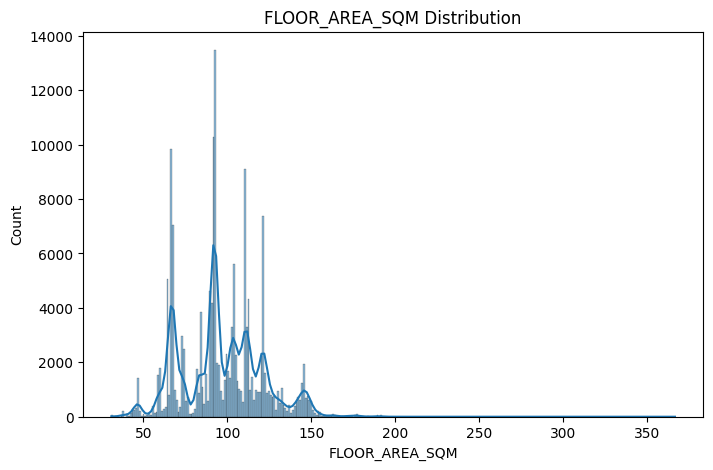

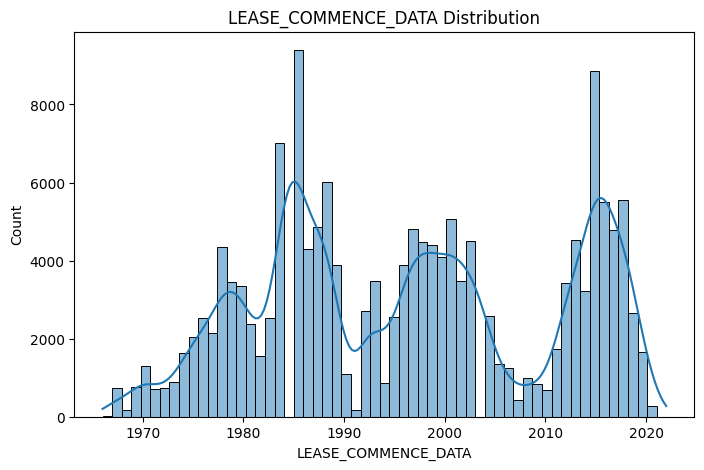

In [5]:

# FLOOR_AREA_SQM & LEASE_COMMENCE_DATA
show_distribution_num("FLOOR_AREA_SQM")
show_distribution_num("LEASE_COMMENCE_DATA")

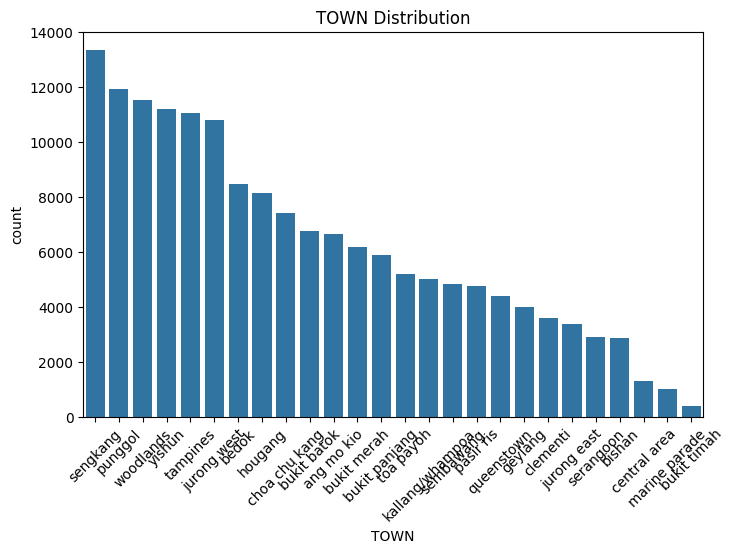

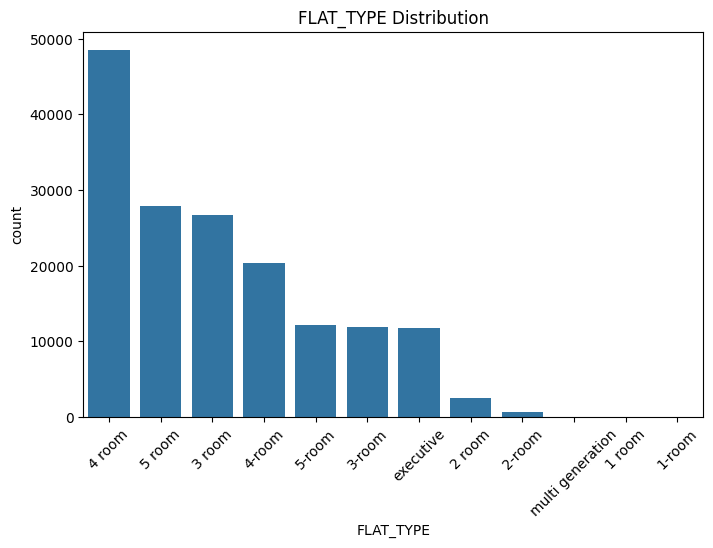

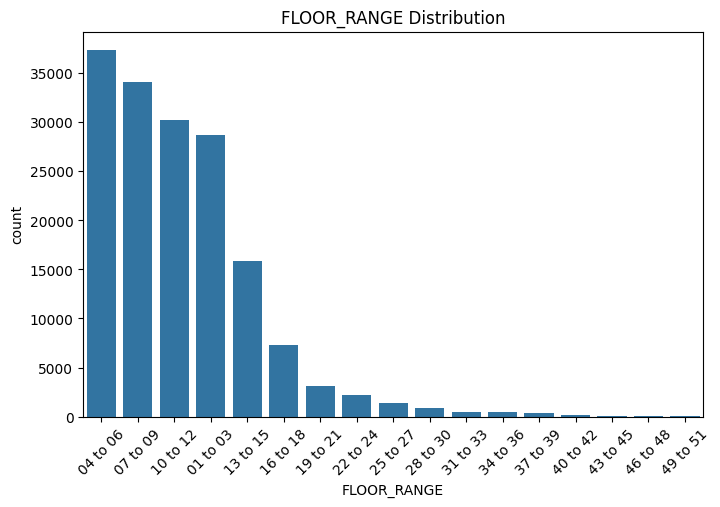

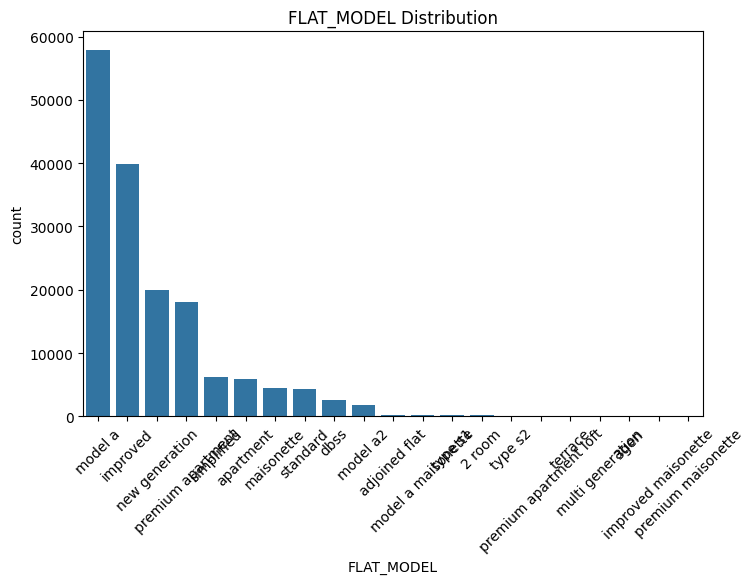

In [6]:
# 3.2 Distribution of other fields
# MONTH, TOWN, FLAT_TYPE, BLOCK, STREET, FLOOR_RANGE, FLAT_MODEL, ECO_CATEGORY 
show_distribution_obj("TOWN")
show_distribution_obj("FLAT_TYPE")
show_distribution_obj("FLOOR_RANGE")
show_distribution_obj("FLAT_MODEL")
# We don't need the distribution of MONTH, BLOCK, STREET
# All ECO_CATEGORY are uncategorized

# FLAT_TYPE = 4 room / 4-room need to be merged.

## Correlation Heatmap

The heatmap visualizes the pairwise correlations between the numerical features in the dataset, with RESALE_PRICE being the target variable.
The color gradient represents the direction and strength of the correlation:

- Red tones indicate positive correlations (as one variable increases, the other tends to increase).

- Blue tones indicate negative correlations (as one increases, the other tends to decrease).

- Lighter shades represent weaker relationships.


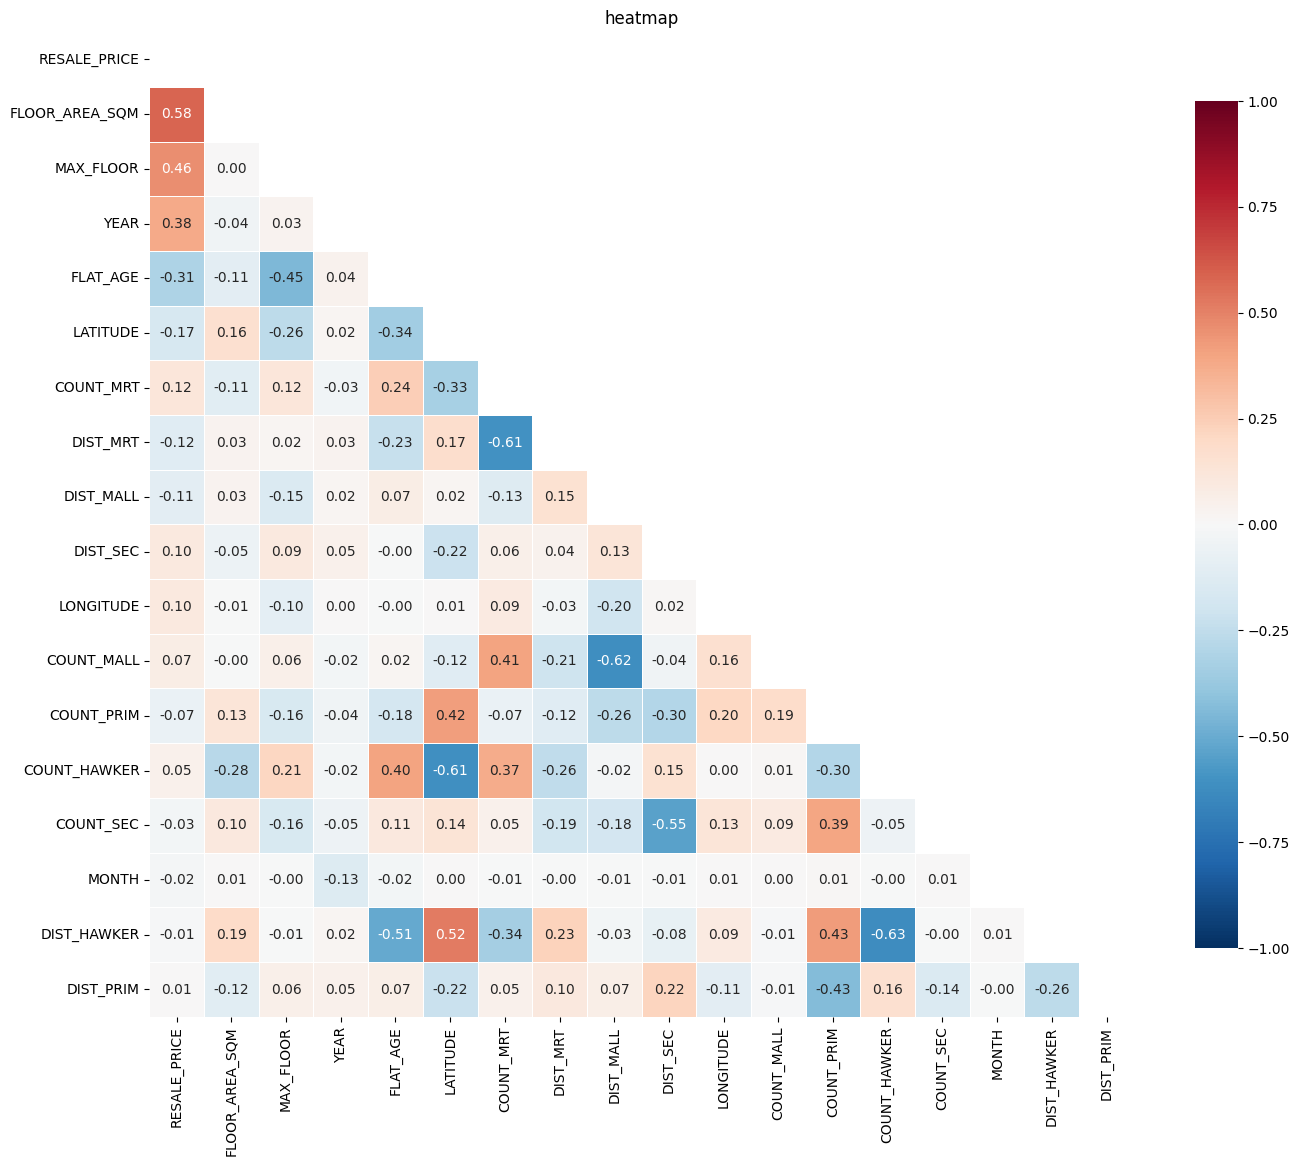

In [2]:
# heatmap related to resale price
num_df= train_amens.iloc[:,1:]

corr = num_df.corr(numeric_only=True)
target = "RESALE_PRICE"
order = corr[target].abs().sort_values(ascending=False).index
corr = corr.loc[order, order]
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr, 
    mask=mask,            
    cmap="RdBu_r",       
    vmin=-1, vmax=1, 
    square=True, 
    annot=True, fmt=".2f",
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.title("heatmap")
plt.tight_layout()
plt.show()

# Outlier analysis

In [22]:
#flat type需要统一一下格式
#floor range low->high 拆一下，后续还可以衍生出一个特征：平均楼层或楼层跨度
train_df["TOWN"].nunique()
train_df["STREET"].nunique()
train_df["BLOCK"].nunique() #block的种类非常多，聚类/删除处理
train_df["FLAT_MODEL"].nunique()
train_df["ECO_CATEGORY"].nunique()
print(f"Number of unique towns: {train_df['TOWN'].nunique()}")
print(f"Number of unique streets: {train_df['STREET'].nunique()}")
print(f"Number of unique flat models: {train_df['FLAT_MODEL'].nunique()}")
print(f"Number of unique blocks: {train_df['BLOCK'].nunique()}")
print(f"Number of unique eco categories: {train_df['ECO_CATEGORY'].nunique()}")

Number of unique towns: 26
Number of unique streets: 1145
Number of unique flat models: 21
Number of unique blocks: 2741
Number of unique eco categories: 1


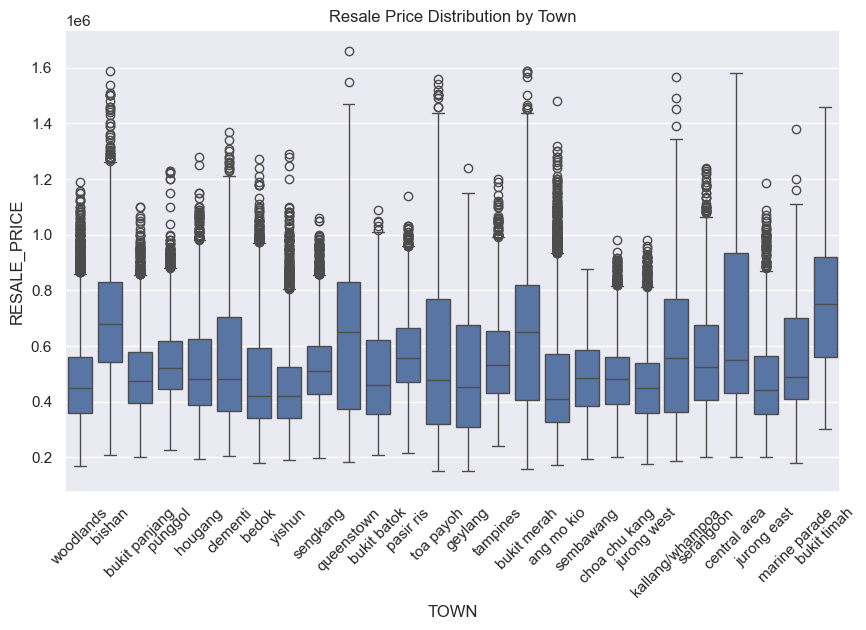

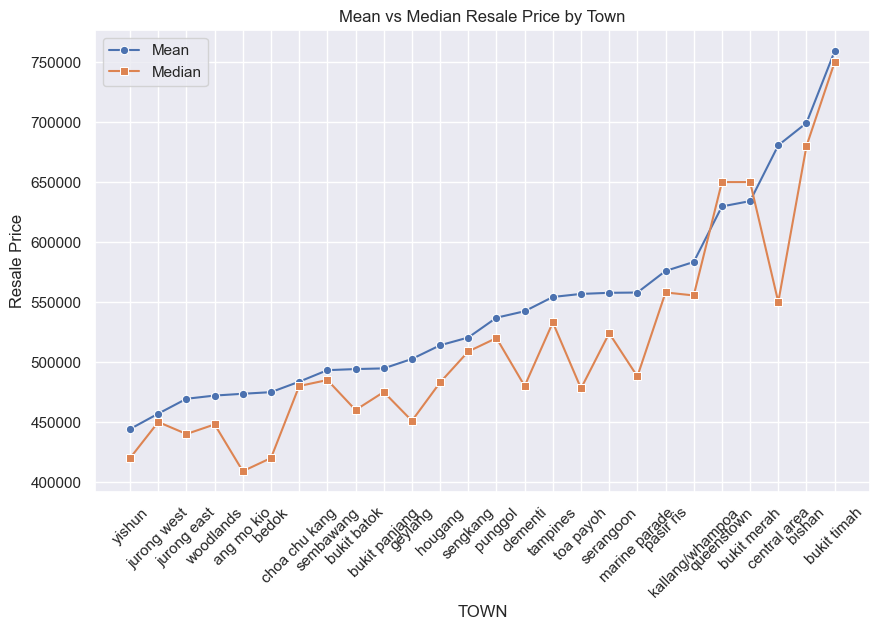

In [23]:
town_price = train_df.groupby("TOWN")["RESALE_PRICE"].describe()
#print(town_price)
plt.figure(figsize=(10,6))
sns.boxplot(x="TOWN", y="RESALE_PRICE", data=train_df)
plt.xticks(rotation=45)
plt.title("Resale Price Distribution by Town")
plt.show()

# 同时绘制均值与中位数
mean_prices_town = train_df.groupby("TOWN")["RESALE_PRICE"].mean()
median_prices_town = train_df.groupby("TOWN")["RESALE_PRICE"].median()
order = mean_prices_town.sort_values().index

plt.figure(figsize=(10,6))
sns.lineplot(x=order, y=mean_prices_town.loc[order].values, marker="o", label="Mean")
sns.lineplot(x=order, y=median_prices_town.loc[order].values, marker="s", label="Median")
plt.xticks(rotation=45)
plt.ylabel("Resale Price")
plt.title("Mean vs Median Resale Price by Town")
plt.legend()
plt.show()

['4 room' '5 room' '3 room' 'executive' '2 room' '1 room'
 'multi generation']
                    count           mean            std       min       25%  \
FLAT_TYPE                                                                     
1 room               57.0  208739.578947   33209.379774  157000.0  180000.0   
2 room             3203.0  294752.512957   62137.396879  150000.0  240000.0   
3 room            38606.0  367421.169600  102652.744567  172000.0  295000.0   
4 room            68873.0  521896.382574  154557.017583  225000.0  415000.0   
5 room            40083.0  616811.113494  170176.684427  270000.0  490000.0   
executive         11801.0  723978.701265  158121.629903  390000.0  600000.0   
multi generation     68.0  861066.941176  135222.636621  630000.0  769000.0   

                       50%       75%        max  
FLAT_TYPE                                        
1 room            205000.0  235000.0   300000.0  
2 room            295000.0  341500.0   578000.0  
3 room   

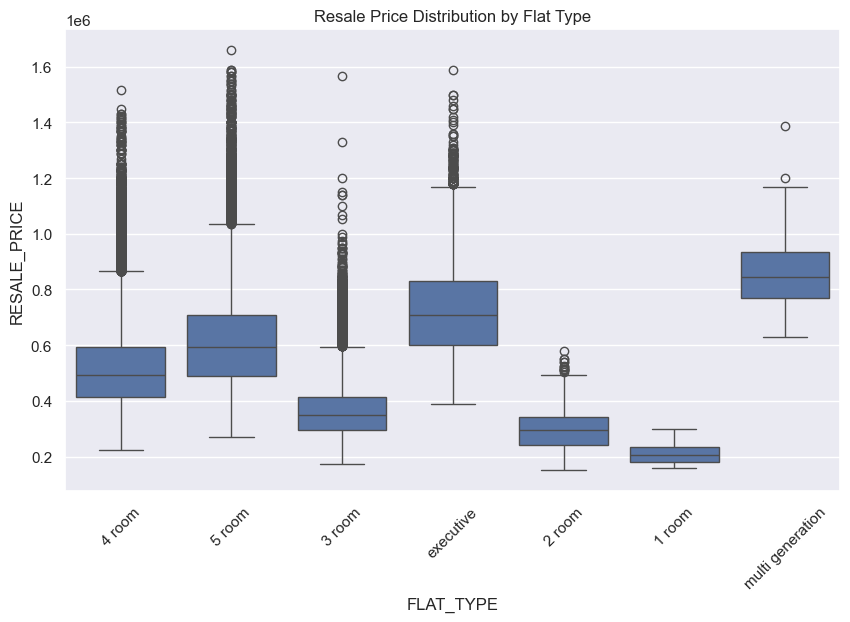

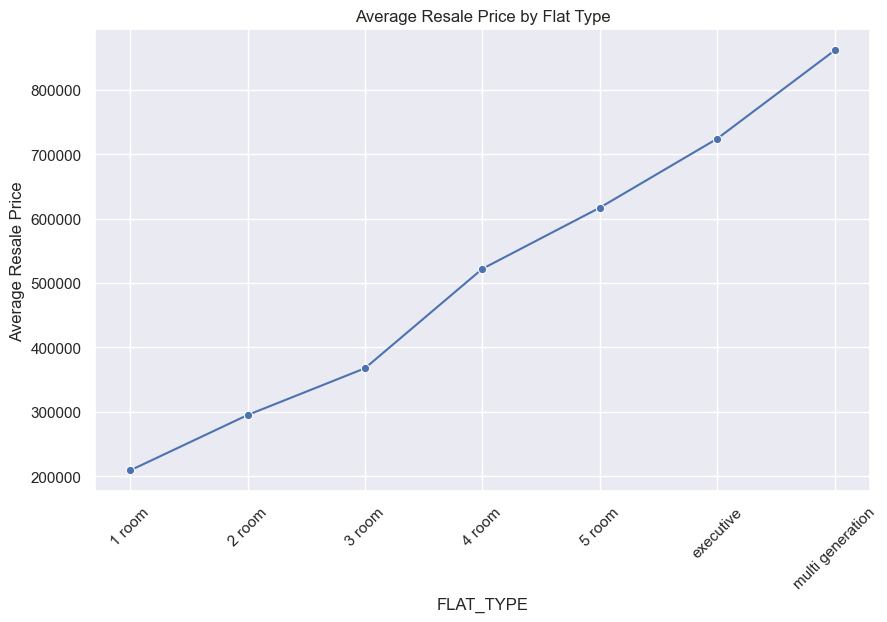

In [24]:
train_df["FLAT_TYPE"] = train_df["FLAT_TYPE"].str.replace(r"[-]+", " ", regex=True)
train_df["FLAT_TYPE"] = train_df["FLAT_TYPE"].str.replace(r"\s+", " ", regex=True).str.strip()
print(train_df["FLAT_TYPE"].unique())
flat_price_stats = train_df.groupby("FLAT_TYPE")["RESALE_PRICE"].describe()
print(flat_price_stats)

plt.figure(figsize=(10,6))
sns.boxplot(x="FLAT_TYPE", y="RESALE_PRICE", data=train_df)
plt.xticks(rotation=45)
plt.title("Resale Price Distribution by Flat Type")
plt.show()

# remove outliers
# sns.boxplot(x="FLAT_TYPE", y="RESALE_PRICE", data=train_df, showfliers=False)

mean_prices = train_df.groupby("FLAT_TYPE")["RESALE_PRICE"].mean().sort_values()
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_prices.index, y=mean_prices.values, marker="o")
plt.xticks(rotation=45)
plt.ylabel("Average Resale Price")
plt.title("Average Resale Price by Flat Type")
plt.show()


['premium apartment' 'model a' 'improved' 'new generation' 'standard'
 'maisonette' 'dbss' 'simplified' 'apartment' 'model a2' 'type s1'
 'adjoined flat' 'model a maisonette' 'type s2' '3gen' '2 room' 'terrace'
 'premium apartment loft' 'premium maisonette' 'multi generation'
 'improved maisonette']


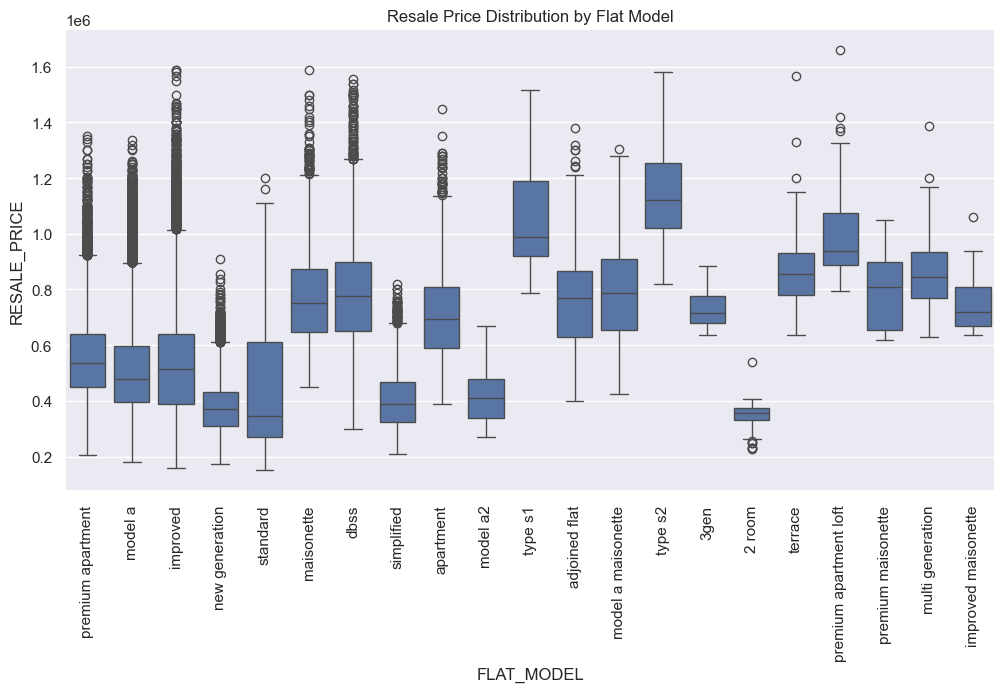

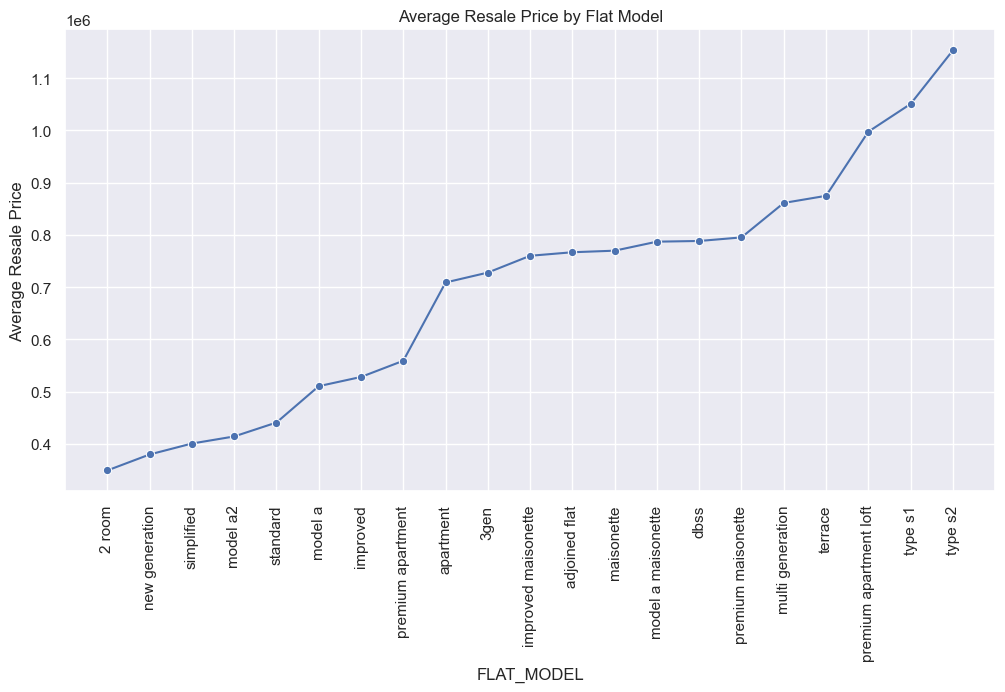

In [26]:
train_df["FLAT_MODEL"].nunique()
print(train_df["FLAT_MODEL"].unique())
flat_model_price_stats = train_df.groupby("FLAT_MODEL")["RESALE_PRICE"].describe()
#print(flat_model_price_stats)
plt.figure(figsize=(12,6))
sns.boxplot(x="FLAT_MODEL", y="RESALE_PRICE", data=train_df)
plt.xticks(rotation=90)  # 横坐标标签太多时旋转
plt.title("Resale Price Distribution by Flat Model")
plt.show()

avg_prices = train_df.groupby("FLAT_MODEL")["RESALE_PRICE"].mean().sort_values()
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_prices.index, y=avg_prices.values, marker="o")
plt.xticks(rotation=90) 
plt.ylabel("Average Resale Price")
plt.title("Average Resale Price by Flat Model")
plt.show()


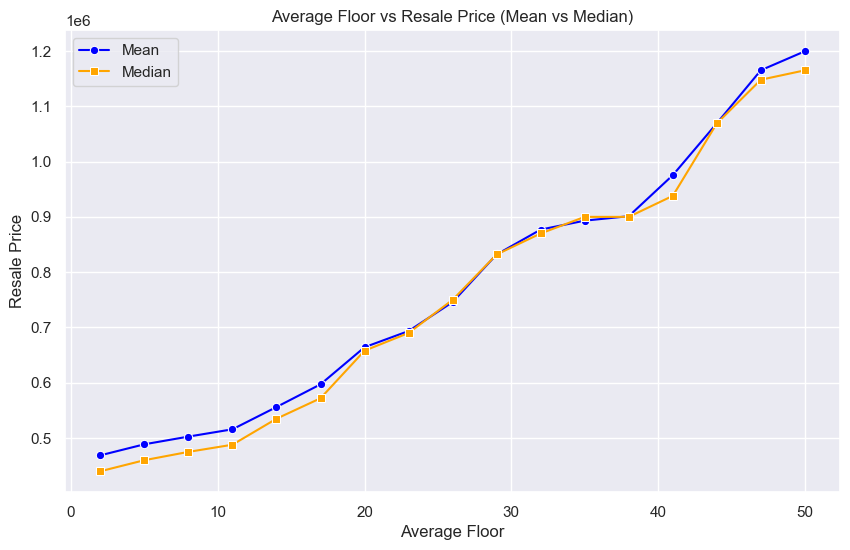

In [30]:
train_df[["FLOOR_LOW", "FLOOR_HIGH"]] = train_df["FLOOR_RANGE"].str.split(" to ", expand=True)
train_df["FLOOR_LOW"] = train_df["FLOOR_LOW"].astype(int)
train_df["FLOOR_HIGH"] = train_df["FLOOR_HIGH"].astype(int)
train_df["FLOOR_AVE"]=(train_df["FLOOR_LOW"] + train_df["FLOOR_HIGH"]) / 2

floor_price = train_df.groupby("FLOOR_AVE")["RESALE_PRICE"].mean().reset_index()
floor_price_median = train_df.groupby("FLOOR_AVE")["RESALE_PRICE"].median().reset_index()

plt.figure(figsize=(10,6))

# 均值
sns.lineplot(x="FLOOR_AVE", y="RESALE_PRICE", data=floor_price, marker="o", label="Mean", color="blue")
# 中位数
sns.lineplot(x="FLOOR_AVE", y="RESALE_PRICE", data=floor_price_median, marker="s", label="Median", color="orange")

plt.title("Average Floor vs Resale Price (Mean vs Median)")
plt.xlabel("Average Floor")
plt.ylabel("Resale Price")
plt.legend()
plt.show()

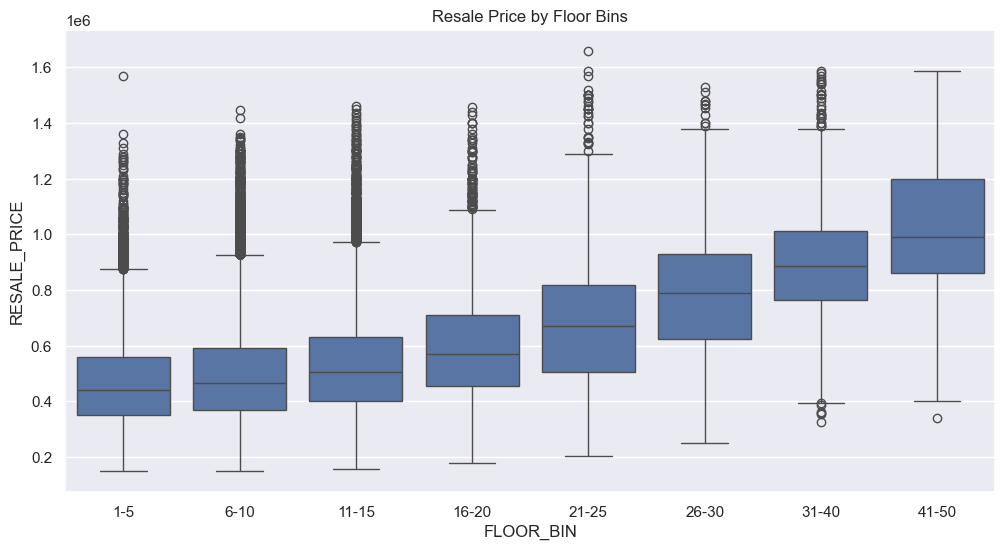

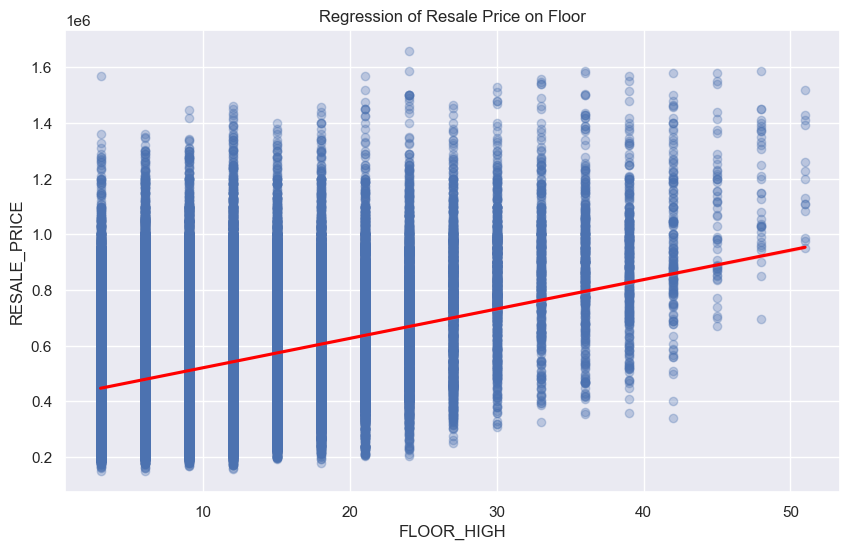

In [ ]:
train_df["FLOOR_BIN"] = pd.cut(train_df["FLOOR_HIGH"], bins=[0,5,10,15,20,25,30,40,50], 
                               labels=["1-5","6-10","11-15","16-20","21-25","26-30","31-40","41-50"])
plt.figure(figsize=(12,6))
sns.boxplot(x="FLOOR_BIN", y="RESALE_PRICE", data=train_df)
plt.title("Resale Price by Floor Bins")
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x="FLOOR_HIGH", y="RESALE_PRICE", data=train_df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title("Regression of Resale Price on Floor")
plt.show()